# Illustrate repeated measures correlation with a simple example

In [1]:
%load_ext autoreload
%autoreload 2
from analysis_settings import *
from plot_settings import *
from scipy.stats import pearsonr, spearmanr
from pingouin import rm_corr, plot_rm_corr
from scripts.utils_plot import _save_fig
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from matplotlib.patches import Patch
import matplotlib.lines as mlines

In [2]:
beta_powers = [1, 2, 3, 4.5, 5.8, 6.5]
updrs_scores = [2, 2.7, 4, 3, 5.5, 6.5]
# hemispheres = ['L', 'R', 'R', 'L', 'L', 'R']
# beta_powers = [1, 2, 4.5, 3, 5.8, 6.5]
# updrs_scores = [2, 2.7, 3, 4, 5.5, 6.5]
hemispheres = ['L', 'R'] * 3
# marker_dict = {'L': 'o', 'R': 'v'}
# markers = [marker_dict[h] for h in hemispheres]
markers = ['o', 'v', 'v', 'o', 'o', 'v']
# patient_list = ['Patient 1', 'Patient 1', 'Patient 2', 'Patient 2', 'Patient 3', 'Patient 3']
# patient_list = ['Pat. 1', 'Pat. 1', 'Pat. 2', 'Pat. 2', 'Pat. 3', 'Pat. 3']
patient_list = ['1', '1', '2', '2', '3', '3']
dark = sns.color_palette("dark")
colors = [dark[0], dark[0], dark[2], dark[2], dark[6], dark[6]]

df1 = pd.DataFrame({'beta_power': beta_powers, 'UPDRS': updrs_scores, 'subject': patient_list,
                   'marker': markers,
                   'ch_hemisphere': hemispheres,
                   'color': colors})

# calc repeated measures correlation
x = 'beta_power'
y = 'UPDRS'
subject = 'subject'
formula = f"Q('{y}') ~ C(Q('{subject}')) + Q('{x}')"
model = ols(formula, data=df1).fit()
df1["pred"] = model.fittedvalues

corr_pearson = pearsonr(df1.beta_power.values, df1.UPDRS.values)
corr_spearman = spearmanr(df1.beta_power.values, df1.UPDRS.values)
corr_within = rm_corr(df1, x='beta_power', y='UPDRS', subject='subject')

# stat_string = (r"Pearson's $r$"f"={corr_pearson[0]:.2f}\n"
#             #    r"Spearman's $\rho$="f"{corr_spearman[0]:.2f}\n"
#                r"Repeated measures $r_{rm}$"f"={corr_within['r'].values[0]:.2f}")
# corr_str_pearson = r"Pearson's $r$"
corr_str_spearman = r"Spearman's $\rho$"
corr_str_rm = r"Repeated measures $r_{rm}$"
corr_str_spearman2 = r"$\rho$"
corr_str_rm2 = r"$r_{rm}$"
stat_string = (
    # f"{corr_str_pearson:<33}={corr_pearson[0]:.2f}\n"
    f"{corr_str_spearman:<33}"r"$=$"f"{corr_spearman[0]:.2f}\n"
    f"{corr_str_rm}"r"$=$"f"{corr_within['r'].values[0]:.2f}")

/Users/moritzgerster/anaconda3/envs/aperiodic/lib/python3.12/site-packages/pingouin/power.py:861: UserWarning: Sample size is too small to estimate power (n <= 4). Returning NaN.
  warnings.warn("Sample size is too small to estimate power (n <= 4). Returning NaN.")


In [3]:
beta_powers2 = [1, 2.2, 3, 4.5, 4.7, 6]
updrs_scores2 = [3.1, 4.7, 3.3, 3.7, 3, 4]
# hemispheres = ['R', 'L', 'L', 'R', 'L', 'R']
markers = ['o', 'v', 'o', 'v', 'o', 'v']

df2 = pd.DataFrame({'beta_power': beta_powers2, 'UPDRS': updrs_scores2, 'subject': patient_list,
                   'marker': markers,
                   'ch_hemisphere': hemispheres,
                   'color': colors})

# calc repeated measures correlation
x = 'beta_power'
y = 'UPDRS'
subject = 'subject'
formula = f"Q('{y}') ~ C(Q('{subject}')) + Q('{x}')"
model = ols(formula, data=df2).fit()
df2["pred"] = model.fittedvalues

corr_pearson = pearsonr(df2.beta_power.values, df2.UPDRS.values)
corr_spearman = spearmanr(df2.beta_power.values, df2.UPDRS.values)
corr_within = rm_corr(df2, x='beta_power', y='UPDRS', subject='subject')

# corr_str_pearson = r"Pearson's $r$"
# corr_str_rm = r"Repeated measures $r_{rm}$"
stat_string2 = (
    # f"{corr_str_pearson:<33}={corr_pearson[0]:.2f}\n"
    f"{corr_str_spearman2:<8}"r"$=$"f"{corr_spearman[0]:.2f}\n"
    f"{corr_str_rm2}"r"$=$"f"{corr_within['r'].values[0]:.2f}")
    # f"{corr_str_spearman2:<8} (across patients)="f"{corr_spearman[0]:.2f}\n"
    # f"{corr_str_rm2} (within patients)="f"{corr_within['r'].values[0]:.2f}")

/Users/moritzgerster/anaconda3/envs/aperiodic/lib/python3.12/site-packages/pingouin/power.py:861: UserWarning: Sample size is too small to estimate power (n <= 4). Returning NaN.
  warnings.warn("Sample size is too small to estimate power (n <= 4). Returning NaN.")


In [4]:
dfs = [df1, df2]
stat_strings = [stat_string, stat_string2]

Spearman's $\rho$                $=$0.94
Repeated measures $r_{rm}$$=$-0.03


$\rho$  $=$0.03
$r_{rm}$$=$0.85


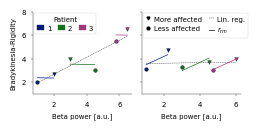

In [5]:

fig, axes = plt.subplots(1, 2, figsize=(2.6, 1.25), sharey=True)

for axi in range(2):
    ax = axes[axi]
    df = dfs[axi]
    for i, subject in enumerate(df.subject.unique()):
        df_sub = df[df['subject'] == subject]
        color = df_sub.color.values[0]
        # Separate loop for each hemisphere to enable different markers
        for hemi in df_sub.ch_hemisphere.unique():
            df_sub_hemi = df_sub[df_sub['ch_hemisphere'] == hemi]
            ax.scatter(df_sub_hemi['beta_power'], df_sub_hemi['UPDRS'],
                       label=subject, marker=df_sub_hemi['marker'].values[0],
                       color=color, s=7, zorder=1,
                    #    markeredgewidth=10,
                    #    markeredgecolor='k'
                    edgecolors='k'
                       )
        # Plot repeated measures correlation
        label = r'$r_{rm}$' if i == 2 else None
        sns.regplot(x=x, y="pred", data=df_sub, ax=ax, scatter=False, ci=None,
                    truncate=True, label=label, color=color,
                    line_kws=dict(linewidth=0.5, zorder=1))

    # Plot linear regression across all data
    coef = np.polyfit(df['beta_power'].values, df['UPDRS'].values, 1)
    poly1d_fn = np.poly1d(coef)

    # X = sm.add_constant(df['beta_power'])
    # model = sm.OLS(df['UPDRS'], X).fit()
    # predictions = model.predict(X)
    # ax.plot(df['beta_power'], predictions, 'k--', label='Lin. reg.')
    ax.plot(df['beta_power'], poly1d_fn(df['beta_power']), 'k--',
            label='Lin. reg.', lw=.25, zorder=0)

    # Set axis
    ax.set_ylabel(None)
    ax.set_xlabel('Beta power [a.u.]')
    ax.set_ylim(1, 8)

# Legend handles
handles = [Patch(color=color) for color in df.color.unique()]
labels = [subject for subject in df.subject.unique()]
axes[0].legend(handles, labels, handlelength=1, ncol=3, title='Patient',
               columnspacing=1,borderaxespad=0.2,
            #    labelspacing=0.1
            handletextpad=0.4, loc='upper left',# bbox_to_anchor=(0, 1.05)
               )
axes[0].set_ylabel('Bradykinesia-Rigidity')

more = mlines.Line2D([], [], color='k', marker='v', markersize=2, lw=0)
less = mlines.Line2D([], [], color='k', marker='o', markersize=2, lw=0)
rm_handle = mlines.Line2D([], [], color='k', lw=.5, linestyle='-')
lin_reg = mlines.Line2D([], [], color='k', linestyle='--', lw=.25)
# handles = [more, less]
# labels = ['More affected', 'Less affected']
handles = [more, less, lin_reg, rm_handle]
labels = ['More affected', 'Less affected', 'Lin. reg.', r'$r_{rm}$']
axes[1].legend(handles, labels, ncol=2, handlelength=.75, columnspacing=1,
               handletextpad=0.4, borderaxespad=0.2,
               loc='upper left',
            #    bbox_to_anchor=(-.01, 1.05)
               )

print(stat_strings[0])
print('\n')
print(stat_strings[1])
# axes[0].set_title(stat_strings[0], ha='left', x=0)
# axes[1].set_title(stat_strings[1], ha='center', x=0.3)
plt.tight_layout()
save_dir = join(SAVE_DIR, 'Figure5')
_save_fig(fig, 'repeated_measures_correlation', save_dir, bbox_inches=None,
          close=False, transparent=True)